In [ ]:
import os
from google.cloud import translate_v2 as translate

json_key_file = "credentials.json"

# Set the environment variable to the path of your JSON key file
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_key_file

# Initialize the Google Translate client
translate_client = translate.Client()

def translate_text(tamil_text):
    # Translate text from Tamil to English
    result = translate_client.translate(tamil_text, source_language='ta', target_language='en')
    return result['translatedText']

# Test the function with Tamil input
output = translate_text("தமிழகத்தில் நாளை 10 மாவட்டங்களில் கனமழைக்கு வாய்ப்பு")
print("Translated Text:", output)






Translated Text: Heavy rain is likely in 10 districts of Tamil Nadu tomorrow


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

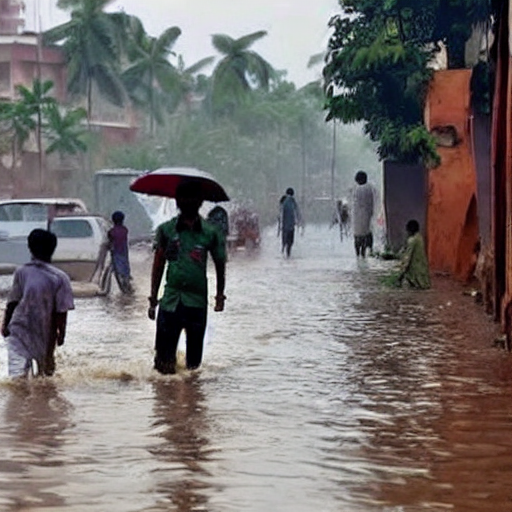

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import IPython.display as display

# Load the stable-diffusion-v1-5 model from Hugging Face
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")  # Ensure GPU is being used for better performance

# Function to generate and display an image from text input
def generate_image_from_text(prompt):
    # Generate image based on the translated text prompt
    image = pipe(prompt).images[0]

    # Display the generated image directly in the notebook
    display.display(image)

# Example usage with the translated text
translated_text = "Heavy rain is likely in 10 districts of Tamil Nadu tomorrow"
generate_image_from_text(translated_text)


In [ ]:
from transformers import pipeline

# Initialize the text-generation pipeline with GPT-2
text_generator = pipeline("text-generation", model="gpt2", device=0)  # Use device=0 if GPU is available

def generate_creative_text(prompt):
    # Generate creative content with adjusted generation parameters for better results
    result = text_generator(
        prompt,
        max_length=200,
        num_return_sequences=1,
        temperature=0.9,        # Higher temperature for more creativity
        top_p=0.85,             # Nucleus sampling for balanced creativity
        do_sample=True,
        repetition_penalty=1.1,
        truncation=True
    )
    return result[0]['generated_text']

# Example usage with the translated text
translated_text = "Heavy rain is likely in 10 districts of Tamil Nadu tomorrow."
creative_text = generate_creative_text(translated_text)
print("Creative Text:", creative_text)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Creative Text: Heavy rain is likely in 10 districts of Tamil Nadu tomorrow. The central government said, "The heavy rains will be a major concern for people on the roads along with other rainfall."
"We are worried that even if we can get some moisture away from these monsoon conditions then it could still affect our crops and water supply," says Bhattacharjee Kumar (R) who lives nearby where he works as an insurance salesman till March 11 at his home near Parga Devi Road".


In [6]:
import os
import gradio as gr
from google.cloud import translate_v2 as translate
import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline
from PIL import Image

# Set up Google Translate API credentials
json_key_file = "credentials.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_key_file

# Initialize Google Translate client
translate_client = translate.Client()

# Initialize Stable Diffusion pipeline for image generation
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# Initialize text generation pipeline with GPT-2
text_generator = pipeline("text-generation", model="gpt2", device=0)

def process_text(tamil_text):
    """Process Tamil text: translate, generate image, and create creative text."""

    # Step 1: Translate Tamil to English
    translated_text = translate_client.translate(tamil_text, source_language='ta', target_language='en')['translatedText']

    # Step 2: Generate Image from Translated Text
    image = pipe(translated_text).images[0]

    # Step 3: Generate Creative Text from Translated Text
    creative_text = text_generator(
        translated_text,
        max_length=200,
        num_return_sequences=1,
        temperature=0.9,
        top_p=0.85,
        do_sample=True,
        repetition_penalty=1.1,
        truncation=True
    )[0]['generated_text']

    return translated_text, image, creative_text

#CSS for a more visually appealing interface
css = """
body {background-color: #f4f4f9; color: #333333; font-family: Arial, sans-serif;}
#input_text {font-size: 1.2em; border: 1px solid #bbb; padding: 12px; border-radius: 8px;}
.gr-image {border-radius: 8px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);}
.gr-button {background-color: #4CAF50; color: white; font-weight: bold; padding: 12px 24px; border-radius: 8px; cursor: pointer;}
.gr-button:hover {background-color: #45a049;}
"""

#Gradio app interface with enhanced style
with gr.Blocks(css=css) as demo:
    gr.Markdown(
        """
        #  TransArt: A Multimodal Application for Vernacular Language Translation and Image Synthesis

        This app translates Tamil text into English, generates a creative image based on the translation, and provides a unique creative text.
        """,
        elem_id="app-title"
    )

    with gr.Row():
        input_text = gr.Textbox(label="📝 Enter Tamil Text", placeholder="Type Tamil text here...", lines=2, elem_id="input_text")

    with gr.Row():
        output_translation = gr.Textbox(label="📜 Translated Text (English)", placeholder="Translation will appear here", elem_id="output_translation")
        output_image = gr.Image(label="🖼️ Generated Image", elem_id="output_image")
        output_creative_text = gr.Textbox(label="✍️ Creative Text", placeholder="Creative text will appear here", elem_id="output_creative_text")

    submit_btn = gr.Button("✨ Generate", elem_id="generate-btn")
    submit_btn.click(
        process_text,
        inputs=input_text,
        outputs=[output_translation, output_image, output_creative_text]
    )

# Launch Gradio app
demo.launch()



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1eb4c8f0eaabb363f1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
